In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cam_diam = 0.1148
rad_per_m = 2/cam_diam

# Open Up the Data Frames

In [3]:
df_copnofilt = pd.read_csv('cop_no_filt_temp.csv')
df_alumfilt = pd.read_csv('alum_filt_temp.csv')
df_alumnofilt = pd.read_csv('alum_no_filt_temp.csv')
df_goldnofilt = pd.read_csv('gold_no_filt_temp.csv')

#Convert all to SI
df_copnofilt['Ring']=df_copnofilt['Ring'].apply(lambda x:x/100)
df_alumfilt['Ring']=df_alumfilt['Ring'].apply(lambda x:x/100)
df_alumnofilt['Ring']=df_alumnofilt['Ring'].apply(lambda x:x/100)
df_goldnofilt['Ring']=df_goldnofilt['Ring'].apply(lambda x:x/100)

# Find the Scattering Angles for Each

In [4]:
def get_angles(df):
    df['Angle'] = df['Ring']/2 * rad_per_m
    # Back rings are actually pi-angle measured
    df['Angle'] = np.where(df['Ring Type'] == 'F', df['Angle'], np.pi-df['Angle'])
    return df

In [5]:
df_copnofilt = get_angles(df_copnofilt)
df_alumfilt = get_angles(df_alumfilt)
df_alumnofilt = get_angles(df_alumnofilt)
df_goldnofilt = get_angles(df_goldnofilt)

# Finding Lattice Spacing

We know that

$$\frac{4 \sin^2 \theta_n}{\lambda^2} = a^{-2}(h^2+k^2+l^2)n^2 $$

In [6]:
def get_space_fac(df):
    df['Factor'] = 4*np.sin(df['Angle'])**2
    return df

In [7]:
df_copnofilt = get_space_fac(df_copnofilt)
df_alumfilt = get_space_fac(df_alumfilt)
df_alumnofilt = get_space_fac(df_alumnofilt)
df_goldnofilt = get_space_fac(df_goldnofilt)

# Get Trial Points

Face centered Cubic Lattice

In [8]:
trial_pnts_1 = np.array([((2*h+1)**2+(2*l+1)**2+(2*k+1)**2)*n**2
              for n in range(1,5) for h in range(5) for l in range(5) for k in range(5)])
trial_pnts_2 = np.array([((2*h)**2+(2*l)**2+(2*k)**2)*n**2
              for n in range(1,5) for h in range(1,5) for l in range(1,5) for k in range(1,5)])
trial_pnts = np.concatenate((trial_pnts_1, trial_pnts_2))
trial_pnts = sorted(np.unique(trial_pnts))

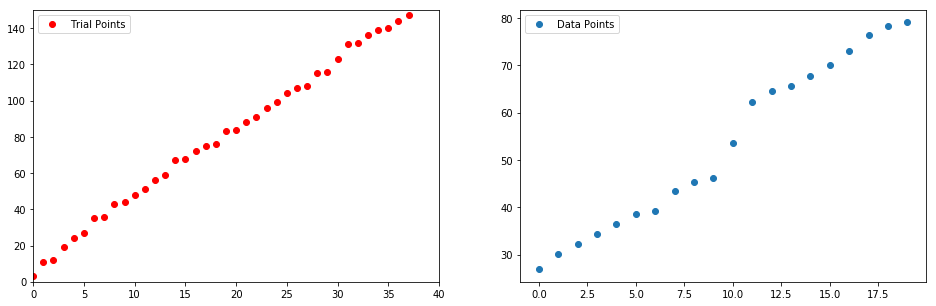

In [22]:
x1 = np.arange(0, len(trial_pnts), 1)
x2 = np.arange(0, len(df_copnofilt), 1)


fig, ax = plt.subplots(1, 2, figsize = (16,5))
ax[0].scatter(x1, sorted(trial_pnts), label='Trial Points', c='r')
ax[1].scatter(x2, sorted(20*df_copnofilt['Factor']), label='Data Points')

ax[0].legend()
ax[1].legend()

ax[0].set_xlim(0,40)
ax[0].set_ylim(0,150)


plt.show()